<a href="https://colab.research.google.com/github/Hadi2430/Ai-Lab-TAsk/blob/main/Final_Project_Group_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing tensorflow
import tensorflow as tf

In [ ]:
#importing sequencial model
from tensorflow.keras.models import Sequential
#importing CNN layers
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
#importing Augmenting library
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#importing others library to store and show data
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Mouting google drive to access data 
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    print("Mounted With Google Drive")
    COLAB = True
    %tensorflow_version 2.x
except:
    COLAB = False

Mounted at /content/drive
Mounted With Google Drive


In [ ]:
#We have stored data in My drive/Dataset folder
DATA_PATH = '/content/drive/My Drive/Dataset'

In [ ]:
#Our test and train directory have specified below
train_dir = '/content/drive/My Drive/Dataset/Train'
validation_dir = '/content/drive/My Drive/Dataset/Test'

In [ ]:
train_Fresh_dir = '/content/drive/My Drive/Dataset/Train/Fresh'
train_Rotten_dir =  '/content/drive/My Drive/Dataset/Train/Rotten'
validation_Fresh_dir = '/content/drive/My Drive/Dataset/Test/Fresh'
validation_Rotten_dir = '/content/drive/My Drive/Dataset/Test/Rotten'

In [ ]:
#Configuring the dataset

#Batch size is 10(Will take 10 image for each run)
batch_size = 10
#Epoch is 50(Will run 50times)
epochs = 50
#Image height and width reduced here for faster train and test
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
#Normalizing the train and test generator for our model
train_image_generator = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255) 

In [ ]:
#Creating Train Data Generator with the selected configuration
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 10901 images belonging to 2 classes.


In [ ]:
#Creating Test Data Generator with the selected configuration
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2698 images belonging to 2 classes.


In [ ]:
#Storing train_data_generator into simple_training_images
sample_training_images, _ = next(train_data_gen)

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

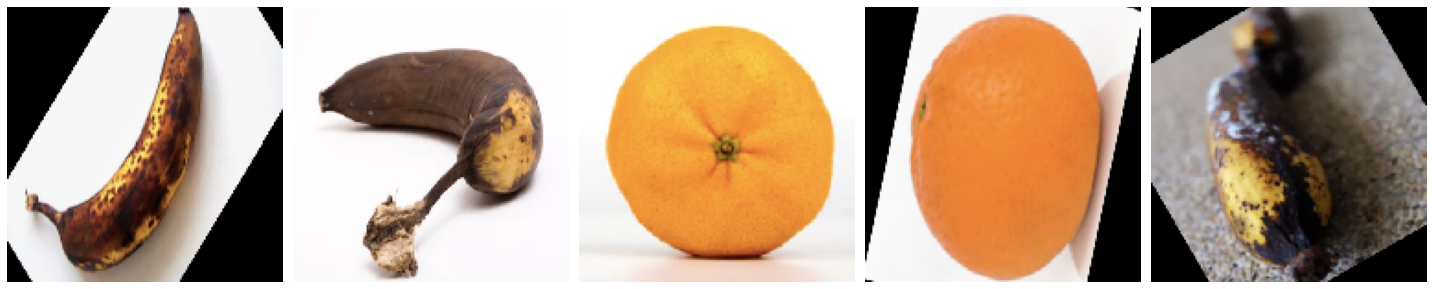

In [ ]:
#Showing Training images including fresh and rotten
plotImages(sample_training_images[:10])

In [ ]:
#Creating our main CNN model to augment images
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),

    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(512, activation='relu'),
    
    Dense(1)
])

In [ ]:
#Adding ADAM optimizer to optimize output
model.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#Printing Model Summery
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [ ]:
#Training our model with 50 epoch
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
8/8 [==============================] - 55s 7s/step - loss: 1.0535 - accuracy: 0.4861 - val_loss: 0.6831 - val_accuracy: 0.4500
Epoch 2/50
8/8 [==============================] - 52s 7s/step - loss: 0.6851 - accuracy: 0.5719 - val_loss: 0.7420 - val_accuracy: 0.4000
Epoch 3/50
8/8 [==============================] - 48s 6s/step - loss: 0.6555 - accuracy: 0.5812 - val_loss: 0.6080 - val_accuracy: 0.6875
Epoch 4/50
8/8 [==============================] - 45s 6s/step - loss: 0.6842 - accuracy: 0.5552 - val_loss: 0.6575 - val_accuracy: 0.4750
Epoch 5/50
8/8 [==============================] - 45s 6s/step - loss: 0.6538 - accuracy: 0.4729 - val_loss: 0.6549 - val_accuracy: 0.7000
Epoch 6/50
8/8 [==============================] - 45s 6s/step - loss: 0.6480 - accuracy: 0.5728 - val_loss: 0.6202 - val_accuracy: 0.5875
Epoch 7/50
8/8 [==============================] - 42s 6s/step - loss: 0.6037 - accuracy: 0.6465 - val_loss: 0.5451 - val_accuracy: 0.7375
Epoch 8/50
8/8 [==================

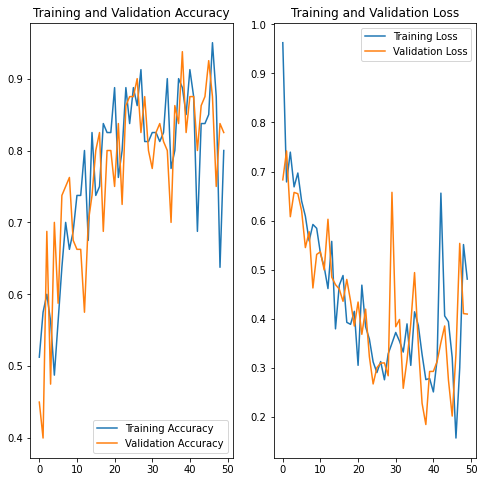

In [ ]:
#Showing accuracy and loss graph
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Basic Augmentation
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True,vertical_flip=True)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 10901 images belonging to 2 classes.


In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

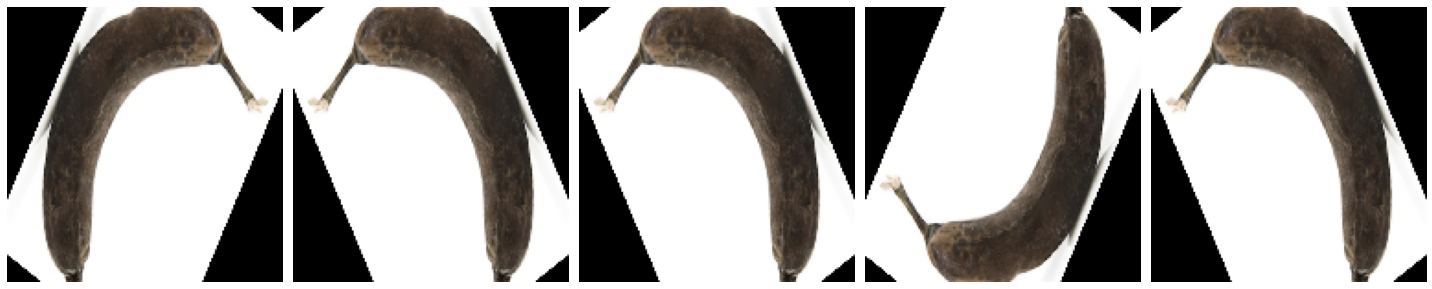

In [ ]:
plotImages(augmented_images)

In [ ]:
#Variation 3
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True,vertical_flip=True,samplewise_center=True,samplewise_std_normalization=True)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 10901 images belonging to 2 classes.


In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(10)]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


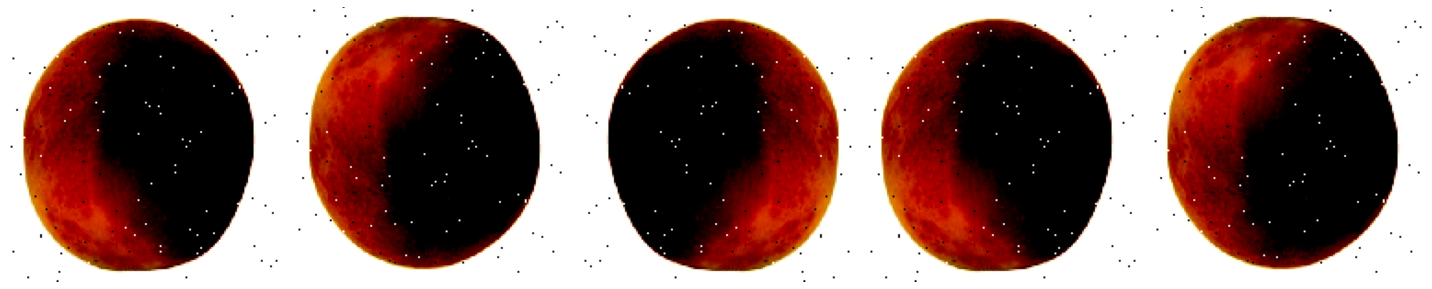

In [ ]:
plotImages(augmented_images)

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 10901 images belonging to 2 classes.


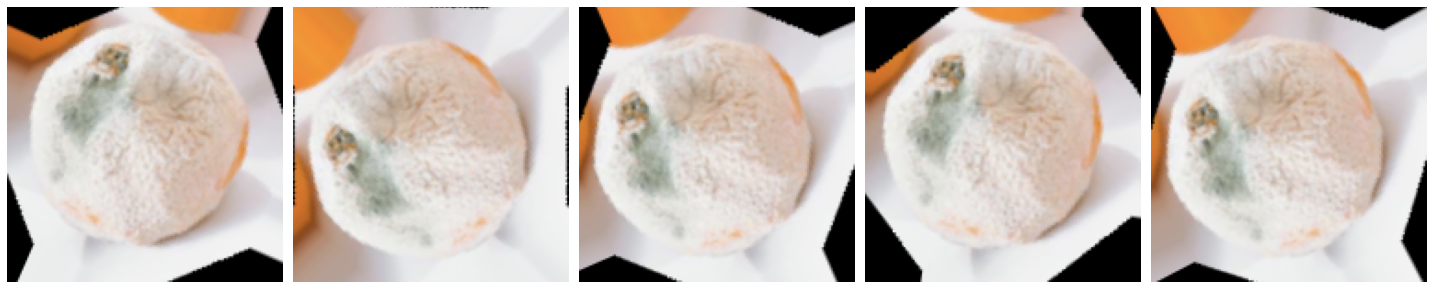

In [ ]:
plotImages(augmented_images)

In [ ]:
#Variation 2
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True,vertical_flip=True)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 10901 images belonging to 2 classes.


In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(10)]

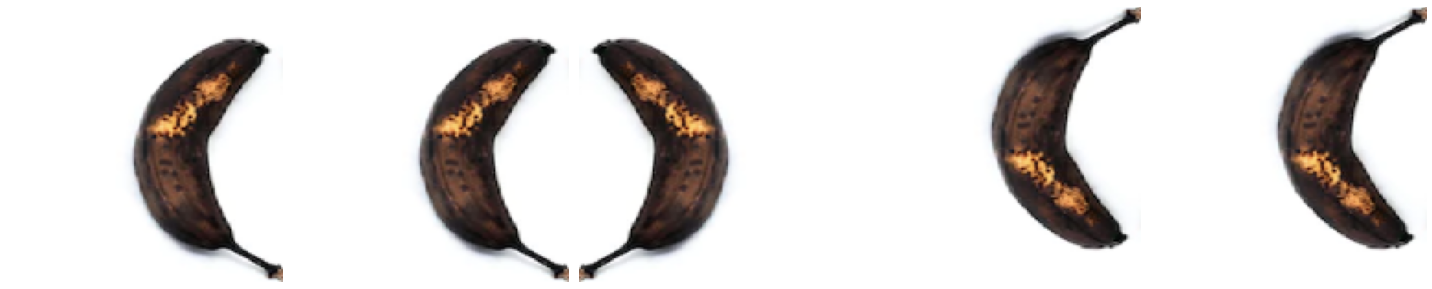

In [ ]:
plotImages(augmented_images)

In [ ]:
#Variation 4
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True,vertical_flip=True,samplewise_center=True,fill_mode='nearest',featurewise_center=True,samplewise_std_normalization=True)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 10901 images belonging to 2 classes.


In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(10)]

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


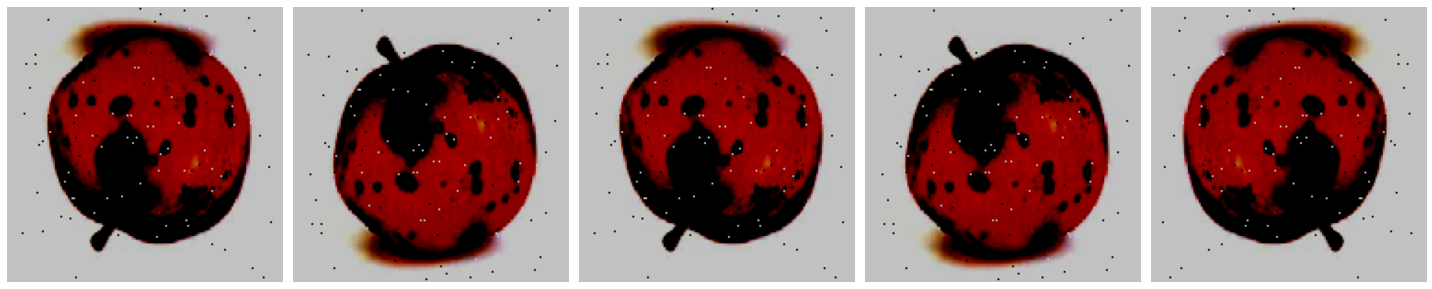

In [ ]:
plotImages(augmented_images)